In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

def split_dataset_4_ways():
    # Cargar dataset
    df = pd.read_csv("pistachio_features.csv")

    print(f"Dataset total: {df.shape}")
    print(f"Distribución original:")
    print(df['CLASS'].value_counts())

    # Separar X y y
    X = df.drop('CLASS', axis=1)
    y = df['CLASS']

    # 1. Separar Extra Virgen (15%)
    X_temp, X_extra_virgen, y_temp, y_extra_virgen = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )

    # 2. Separar Virgen (15% del total = ~17.6% del restante)
    X_temp2, X_virgen, y_temp2, y_virgen = train_test_split(
        X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
    )

    # 3. Separar test (20% del total = ~24.3% del restante)
    X_train, X_test, y_train, y_test = train_test_split(
        X_temp2, y_temp2, test_size = 0.243, random_state = 42, stratify= y_temp2
    )

    print(f"\nDivisión final:")
    print(f"Train: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    print(f"Virgen: {len(X_virgen)} ({len(X_virgen)/len(X)*100:.1f}%)")
    print(f"Extra Virgen: {len(X_extra_virgen)} ({len(X_extra_virgen)/len(X)*100:.1f}%)")
    
    return (X_train, X_test, X_virgen, X_extra_virgen, 
            y_train, y_test, y_virgen, y_extra_virgen)

def evaluate_model_complete(model, X, y, y_pred, y_pred_proba, set_name):
    """Evaluación completa con todas las métricas"""
    print(f"\n=== {set_name.upper()} ===")
    
    # Métricas básicas
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    recall = recall_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    f1 = f1_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # AUC-ROC
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    auc_roc = roc_auc_score(y_encoded, y_pred_proba[:, 1])  # Probabilidad clase positiva
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Kirmizi', 'Siirt'], 
                yticklabels=['Kirmizi', 'Siirt'])
    plt.title(f'Matriz de Confusión - {set_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()
    
    return accuracy, precision, recall, f1, auc_roc

def evaluate_model_complete(model, X, y, y_pred, y_pred_proba, set_name):
    """Evaluación completa con todas las métricas"""
    print(f"\n=== {set_name.upper()} ===")
    
    # Métricas básicas
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    recall = recall_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    f1 = f1_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # AUC-ROC
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    auc_roc = roc_auc_score(y_encoded, y_pred_proba[:, 1])  # Probabilidad clase positiva
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Kirmizi', 'Siirt'], 
                yticklabels=['Kirmizi', 'Siirt'])
    plt.title(f'Matriz de Confusión - {set_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()
    
    return accuracy, precision, recall, f1, auc_roc

def train_with_complete_evaluation():
    # Cargar y dividir dataset
    df = pd.read_csv("pistachio_features.csv")
    X = df.drop('CLASS', axis=1)
    y = df['CLASS']
    
    # División en 4 conjuntos (como antes)
    X_temp, X_extra_virgen, y_temp, y_extra_virgen = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )
    X_temp2, X_virgen, y_temp2, y_virgen = train_test_split(
        X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X_temp2, y_temp2, test_size=0.243, random_state=42, stratify=y_temp2
    )
    
    # Normalizar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_virgen_scaled = scaler.transform(X_virgen)
    X_extra_virgen_scaled = scaler.transform(X_extra_virgen)
    
    # Entrenar modelo
    rf = LogisticRegression()#RandomForestClassifier(random_state=42, n_estimators=100)
    rf.fit(X_train_scaled, y_train)
    
    # Predicciones y probabilidades para cada conjunto
    train_pred = rf.predict(X_train_scaled)
    train_proba = rf.predict_proba(X_train_scaled)
    
    test_pred = rf.predict(X_test_scaled)
    test_proba = rf.predict_proba(X_test_scaled)
    
    virgen_pred = rf.predict(X_virgen_scaled)
    virgen_proba = rf.predict_proba(X_virgen_scaled)
    
    extra_virgen_pred = rf.predict(X_extra_virgen_scaled)
    extra_virgen_proba = rf.predict_proba(X_extra_virgen_scaled)
    
    # Evaluación completa
    train_metrics = evaluate_model_complete(rf, X_train_scaled, y_train, train_pred, train_proba, "Train")
    test_metrics = evaluate_model_complete(rf, X_test_scaled, y_test, test_pred, test_proba, "Test")
    virgen_metrics = evaluate_model_complete(rf, X_virgen_scaled, y_virgen, virgen_pred, virgen_proba, "Virgen")
    extra_virgen_metrics = evaluate_model_complete(rf, X_extra_virgen_scaled, y_extra_virgen, extra_virgen_pred, extra_virgen_proba, "Extra Virgen")
    
    # Resumen final
    print(f"\n=== RESUMEN FINAL ===")
    print(f"{'Set':<15} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'AUC-ROC':<10}")
    print("-" * 70)
    print(f"{'Train':<15} {train_metrics[0]:<10.4f} {train_metrics[1]:<10.4f} {train_metrics[2]:<10.4f} {train_metrics[3]:<10.4f} {train_metrics[4]:<10.4f}")
    print(f"{'Test':<15} {test_metrics[0]:<10.4f} {test_metrics[1]:<10.4f} {test_metrics[2]:<10.4f} {test_metrics[3]:<10.4f} {test_metrics[4]:<10.4f}")
    print(f"{'Virgen':<15} {virgen_metrics[0]:<10.4f} {virgen_metrics[1]:<10.4f} {virgen_metrics[2]:<10.4f} {virgen_metrics[3]:<10.4f} {virgen_metrics[4]:<10.4f}")
    print(f"{'Extra Virgen':<15} {extra_virgen_metrics[0]:<10.4f} {extra_virgen_metrics[1]:<10.4f} {extra_virgen_metrics[2]:<10.4f} {extra_virgen_metrics[3]:<10.4f} {extra_virgen_metrics[4]:<10.4f}")



=== TRAIN ===
Accuracy: 0.8628
Precision: 0.8804
Recall: 0.8804
F1-Score: 0.8804
AUC-ROC: 0.9365


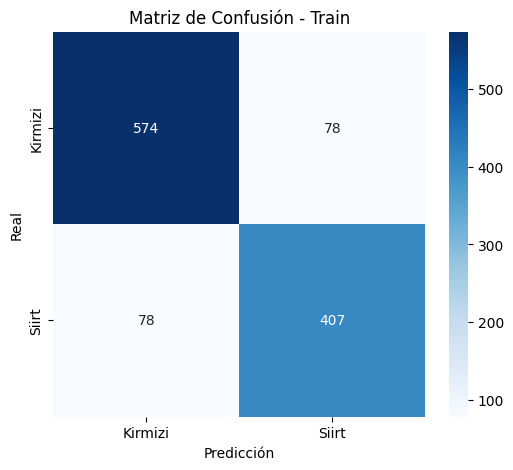


=== TEST ===
Accuracy: 0.8443
Precision: 0.8370
Recall: 0.9048
F1-Score: 0.8696
AUC-ROC: 0.9305


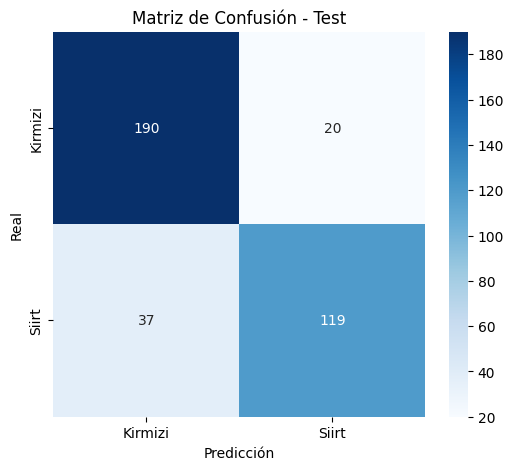


=== VIRGEN ===
Accuracy: 0.8820
Precision: 0.8808
Recall: 0.9189
F1-Score: 0.8995
AUC-ROC: 0.9485


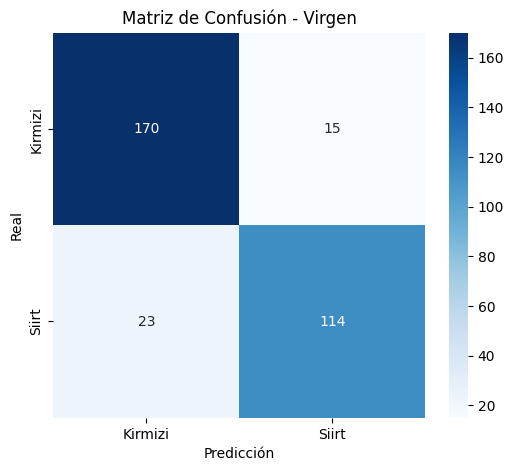


=== EXTRA VIRGEN ===
Accuracy: 0.8297
Precision: 0.8316
Recall: 0.8811
F1-Score: 0.8556
AUC-ROC: 0.9199


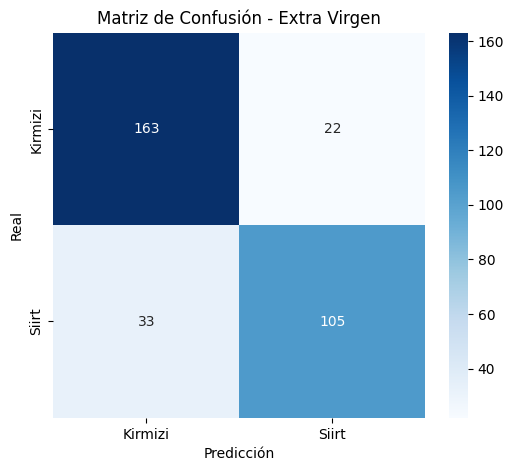


=== RESUMEN FINAL ===
Set             Accuracy   Precision  Recall     F1         AUC-ROC   
----------------------------------------------------------------------
Train           0.8628     0.8804     0.8804     0.8804     0.9365    
Test            0.8443     0.8370     0.9048     0.8696     0.9305    
Virgen          0.8820     0.8808     0.9189     0.8995     0.9485    
Extra Virgen    0.8297     0.8316     0.8811     0.8556     0.9199    


In [6]:
train_with_complete_evaluation()

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd

def hyperparameter_tuning():
    """Ajusta hiperparámetros usando Train/Test, optimiza para Virgen"""
    
    # Cargar y dividir datos (mismo código que antes)
    df = pd.read_csv("pistachio_features.csv")
    X = df.drop('CLASS', axis=1)
    y = df['CLASS']
    
    # División en 4 conjuntos
    X_temp, X_extra_virgen, y_temp, y_extra_virgen = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )
    X_temp2, X_virgen, y_temp2, y_virgen = train_test_split(
        X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X_temp2, y_temp2, test_size=0.243, random_state=42, stratify=y_temp2
    )
    
    # Normalizar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_virgen_scaled = scaler.transform(X_virgen)
    X_extra_virgen_scaled = scaler.transform(X_extra_virgen)
    
    # IMPORTANTE: Combinar Train + Test para GridSearchCV
    X_train_test = np.vstack([X_train_scaled, X_test_scaled])
    y_train_test = np.concatenate([y_train, y_test])
    
    # Hiperparámetros a probar
    param_grid = {
        'C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],  # Compatible con l1 y l2
        'max_iter': [1000, 2000]
    }
    
    # GridSearchCV usando Train+Test combinados
    lr = LogisticRegression(random_state=42)
    grid_search = GridSearchCV(
        lr, param_grid, 
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print("Iniciando GridSearchCV...")
    grid_search.fit(X_train_test, y_train_test)
    
    print(f"Mejores parámetros: {grid_search.best_params_}")
    print(f"Mejor score CV: {grid_search.best_score_:.4f}")
    
    # Entrenar modelo final con mejores parámetros
    best_model = grid_search.best_estimator_
    
    # Evaluar en Virgen (objetivo de optimización)
    virgen_pred = best_model.predict(X_virgen_scaled)
    virgen_proba = best_model.predict_proba(X_virgen_scaled)
    virgen_acc = accuracy_score(y_virgen, virgen_pred)
    
    # Evaluar en Extra Virgen (evaluación final intocable)
    extra_pred = best_model.predict(X_extra_virgen_scaled)
    extra_proba = best_model.predict_proba(X_extra_virgen_scaled)
    extra_acc = accuracy_score(y_extra_virgen, extra_pred)
    
    print(f"\n=== RESULTADOS OPTIMIZADOS ===")
    print(f"Virgen (objetivo): {virgen_acc:.4f}")
    print(f"Extra Virgen (final): {extra_acc:.4f}")
    
    return best_model, scaler


best_model, scaler = hyperparameter_tuning()

Iniciando GridSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarni

Mejores parámetros: {'C': 10.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor score CV: 0.8669

=== RESULTADOS OPTIMIZADOS ===
Virgen (objetivo): 0.8820
Extra Virgen (final): 0.8204


/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dany/Documents/Pistachio Dataset/pistachio_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarni

In [8]:
from sklearn.ensemble import RandomForestClassifier

def tune_random_forest():
    """Optimiza Random Forest para reducir overfitting"""
    
    # Cargar y dividir datos (mismo código que antes)
    df = pd.read_csv("pistachio_features.csv")
    X = df.drop('CLASS', axis=1)
    y = df['CLASS']
    
    # División en 4 conjuntos
    X_temp, X_extra_virgen, y_temp, y_extra_virgen = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )
    X_temp2, X_virgen, y_temp2, y_virgen = train_test_split(
        X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X_temp2, y_temp2, test_size=0.243, random_state=42, stratify=y_temp2
    )
    
    # Normalizar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_virgen_scaled = scaler.transform(X_virgen)
    X_extra_virgen_scaled = scaler.transform(X_extra_virgen)
    
    # IMPORTANTE: Combinar Train + Test para GridSearchCV
    X_train_test = np.vstack([X_train_scaled, X_test_scaled])
    y_train_test = np.concatenate([y_train, y_test])

    # [Mismo código de carga y división]
    
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [5, 10, 20],
        'min_samples_leaf': [2, 5, 10]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
    
    print("Optimizando Random Forest...")
    grid_rf.fit(X_train_test, y_train_test)
    
    print(f"Mejores parámetros RF: {grid_rf.best_params_}")
    
    # Evaluar en Virgen
    best_rf = grid_rf.best_estimator_
    virgen_pred_rf = best_rf.predict(X_virgen_scaled)
    virgen_acc_rf = accuracy_score(y_virgen, virgen_pred_rf)
    
    print(f"Random Forest optimizado - Virgen: {virgen_acc_rf:.4f}")

if __name__ == "__main__":
    tune_random_forest()

Optimizando Random Forest...
Mejores parámetros RF: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest optimizado - Virgen: 0.8447


Optimizando Random Forest...
Mejores parámetros RF: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

=== VIRGEN ===
Accuracy: 0.8447
Precision: 0.8610
Recall: 0.8703
F1-Score: 0.8656
AUC-ROC: 0.9362


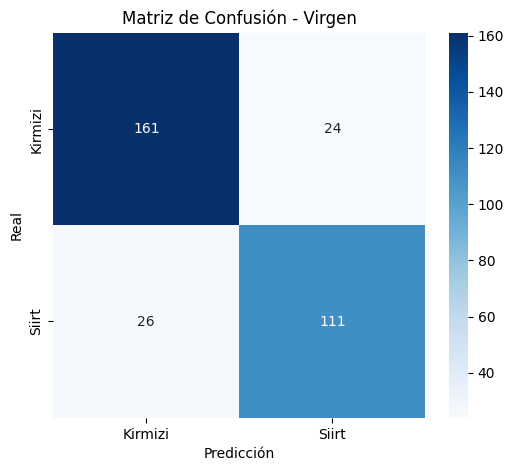


=== EXTRA VIRGEN ===
Accuracy: 0.8328
Precision: 0.8359
Recall: 0.8811
F1-Score: 0.8579
AUC-ROC: 0.9157


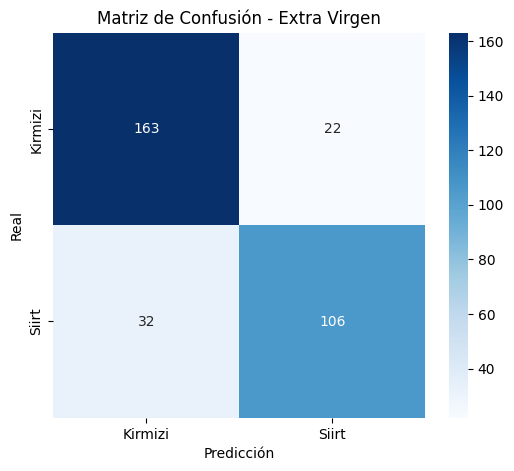

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_complete(model, X, y, set_name):
    """Evaluación completa con todas las métricas"""
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)
    
    print(f"\n=== {set_name.upper()} ===")
    
    # Métricas básicas (clase positiva = Kirmizi_Pistachio)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    recall = recall_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    f1 = f1_score(y, y_pred, pos_label='Kirmizi_Pistachio')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # AUC-ROC (codificar etiquetas)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    auc_roc = roc_auc_score(y_encoded, y_pred_proba[:, 1])
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Kirmizi', 'Siirt'], 
                yticklabels=['Kirmizi', 'Siirt'])
    plt.title(f'Matriz de Confusión - {set_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()
    
    return accuracy, precision, recall, f1, auc_roc

def tune_random_forest():
    """Optimiza Random Forest y evalúa en Virgen y Extra Virgen"""
    df = pd.read_csv("pistachio_features.csv")
    X = df.drop('CLASS', axis=1)
    y = df['CLASS']

    # División en 4 conjuntos
    X_temp, X_extra_virgen, y_temp, y_extra_virgen = train_test_split(
        X, y, test_size=0.15, random_state=42, stratify=y
    )
    X_temp2, X_virgen, y_temp2, y_virgen = train_test_split(
        X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X_temp2, y_temp2, test_size=0.243, random_state=42, stratify=y_temp2
    )

    # Escalado
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_virgen_scaled = scaler.transform(X_virgen)
    X_extra_virgen_scaled = scaler.transform(X_extra_virgen)

    # GridSearchCV
    X_train_test = np.vstack([X_train_scaled, X_test_scaled])
    y_train_test = np.concatenate([y_train, y_test])

    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [5, 10, 20],
        'min_samples_leaf': [2, 5, 10]
    }

    rf = RandomForestClassifier(random_state=42)
    grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

    print("Optimizando Random Forest...")
    grid_rf.fit(X_train_test, y_train_test)
    print(f"Mejores parámetros RF: {grid_rf.best_params_}")

    best_rf = grid_rf.best_estimator_

    # Evaluar en Virgen y Extra Virgen
    evaluate_model_complete(best_rf, X_virgen_scaled, y_virgen, "Virgen")
    evaluate_model_complete(best_rf, X_extra_virgen_scaled, y_extra_virgen, "Extra Virgen")

if __name__ == "__main__":
    tune_random_forest()
